# Step 1: Installation and Setup

In [1]:
!pip install --upgrade pip setuptools

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.17.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2:Importing the dataset from kaggle to google colab

In [6]:
# install kaggle API
! pip install kaggle

In [7]:
# Creating a directory as kaggle

! mkdir -p ~/.kaggle

In [8]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [9]:
# copying the API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [10]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [11]:
# list of datasets
! kaggle datasets list

ref                                                            title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                    3MB  2024-08-09 17:52:25           4280         96  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                        1KB  2024-08-14 11:02:45           2044         45  1.0              
haseebindata/student-performance-predictions                   Student Performance Predictions                   9KB  2024-08-17 06:57:57           1173         30  0.88235295       
mrmars1010/imdb-top250-india                                   IMDB India  Top250    

In [12]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
100% 66.0M/66.0M [00:02<00:00, 33.2MB/s]
100% 66.0M/66.0M [00:02<00:00, 23.7MB/s]


In [13]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [14]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [15]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
len(dataset_1.columns)

31

# Step 3: Data Preprocessing

In [17]:
dataset_1.shape

(284807, 31)

In [18]:
# Checking null values
dataset_1.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [19]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
# Observation in each class
dataset_1['Class'].value_counts()

,count
Class,
0,284315
1,492


The given dataset is highly unbalanced

In [21]:
# Balanced the dataset

# Given 1 for fraud transaction
# and 0 for non fraud transaction

fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [22]:
fraud.shape

(492, 31)

In [23]:
non_fraud.shape

(284315, 31)

In [24]:
# To balance this dataset there should be almost eqaul transaction in each class

# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [25]:
non_fraud_t.shape

(492, 31)

In [27]:
# merge datasets
dataset = pd.concat([fraud, non_fraud_t], ignore_index=True)

In [28]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  137742.0  2.031097 -0.213261 -1.176199  0.406760  0.117175 -0.340831   
980   39144.0  0.567478 -0.267153  0.097535  2.540587  0.430239  1.202312   
981  103689.0  1.750074 -0.645446 -0.426772  0.532054 -0.547827 -0.100621   
982   33312.0 -0.964706  0.538998  0.407899 -2.355325  0.249083  0.291582   
983   38793.0  0.880830 -0.110166  0.003060  1.434768 -0.015892 -0.293294   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [30]:
# Observation in each class
dataset['Class'].value_counts()

,count
Class,
1,492
0,492


Equal number of observation in each class

In [31]:
# matrix of features / independent variable

x = dataset.drop(labels=['Class'], axis = 1)

In [32]:
# Dependent variable

y= dataset['Class']

In [33]:
x.shape, y.shape

((984, 30), (984,))

In [34]:
# splitting the dataset into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [35]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [36]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
x_train

array([[ 1.18939871,  0.76253127, -1.15668701, ..., -0.17816079,
        -0.10145277,  0.97210354],
       [-0.83373708,  0.50730131, -0.07559158, ...,  0.48260654,
         0.60736024, -0.49490129],
       [-0.87045964,  0.18780479,  0.11955055, ...,  0.32164541,
         0.45861307, -0.49386344],
       ...,
       [ 0.47003808,  0.24543523,  0.04327664, ..., -0.02856312,
         0.343579  , -0.49485805],
       [-0.68916528,  0.57539654, -0.98527995, ..., -0.18108922,
         0.08378263,  1.01327169],
       [-1.13147136,  0.28669464, -0.0528029 , ..., -0.29136234,
         0.07174208, -0.13126364]])

In [38]:
# Converting y_train and y_test to numpy array
# because they have only one column

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [39]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

Here x_test and x_train are only in 1D and we have to convert them in 2D

We have to change the dimension because the CNN layer will take the dataset only in this way

In [40]:
# reshape the dataset

x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [41]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [42]:
# define an object

model = tf.keras.models.Sequential()

In [43]:
# first CNN layer

model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation = 'relu', input_shape = (30,1)))

# batch normalization
# used to normalise the inputs of each layer
# due to batch normalization speed , stability and performace of the network increses

model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
# selects the maximum layer from each batch

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
# regularization technique
# we are ignoring 20 percent neurons while training
# these 20 percent is randomly selected

model.add(tf.keras.layers.Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# second CNN layer

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation = 'relu'))

# batch normalization
# used to normalise the inputs of each layer
# due to batch normalization speed , stability and performace of the network increses

model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
# selects the maximum layer from each batch

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
# regularization technique
# we are ignoring 20 percent neurons while training
# these 20 percent is randomly selected

model.add(tf.keras.layers.Dropout(0.3))

In [47]:
# flatten layer
# converts array into a vector

model.add(tf.keras.layers.Flatten())


In [48]:
# first dense layer
model.add(tf.keras.layers.Dense(units = 64, activation ='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [50]:
# output layer
model.add(tf.keras.layers.Dense(units =1, activation = 'sigmoid'))

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 15, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,441 (130.63 KB)

 Trainable params: 33,249 (129.88 KB)

 Non-trainable params: 192 (768.00 B)

In [52]:
# Compiling the model

opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)

In [53]:
model.compile(optimizer = opt, loss ='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [54]:
history = model.fit(x_train, y_train, epochs = 25, validation_data = (x_test, y_test))

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6298 - loss: 0.7536 - val_accuracy: 0.8680 - val_loss: 0.6017
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7552 - loss: 0.5618 - val_accuracy: 0.8985 - val_loss: 0.5799
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8090 - loss: 0.4576 - val_accuracy: 0.9340 - val_loss: 0.5586
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8230 - loss: 0.4209 - val_accuracy: 0.9391 - val_loss: 0.5310
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8637 - loss: 0.3788 - val_accuracy: 0.9492 - val_loss: 0.4922
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8624 - loss: 0.3440 - val_accuracy: 0.9340 - val_loss: 0.4539
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8904 - loss: 0.2888 - val_accuracy: 0.9340 - val_loss: 0.4152
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8898 - loss: 0.2822 - val_accuracy: 0.9340 - val_loss

In [56]:
# model predictions
# Get predicted probabilities
y_pred_prob = model.predict(x_test)

# Apply threshold to convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [59]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [60]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [ 10  81]]


In [62]:
# calculating accuracy using confusion matrix

acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9441624365482234


# Step 6: Learning Curve

In [63]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

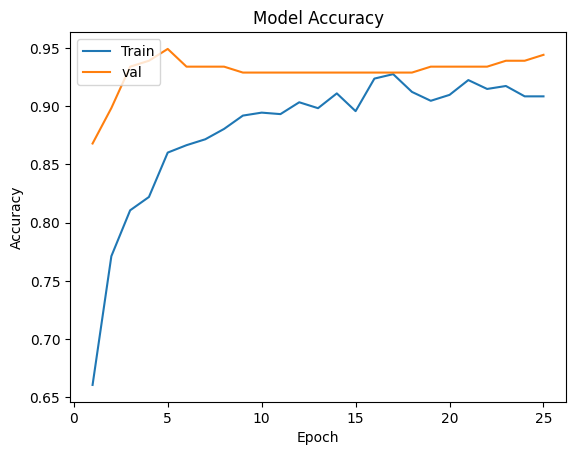

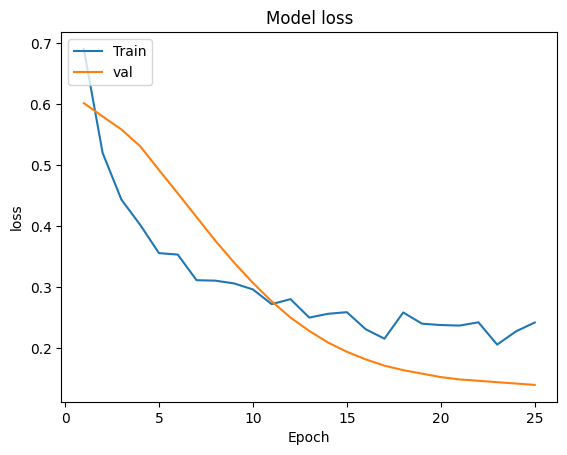

In [64]:
learning_curve(history, 25)